GMM Accuracy: 0.5063915385114529
              precision    recall  f1-score   support

           0       0.57      0.45      0.50     59879
           1       0.46      0.58      0.51     47998

    accuracy                           0.51    107877
   macro avg       0.51      0.51      0.51    107877
weighted avg       0.52      0.51      0.51    107877



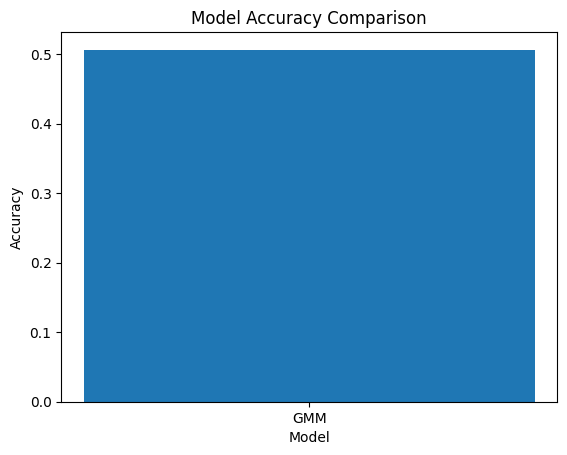

CPU times: total: 12.4 s
Wall time: 12.2 s


In [1]:
%%time
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load and read the dataset
data = pd.read_csv(r"D:\users\m_ozdemir15\Desktop\Okul\Y.Lisans\2.Dönem\Makine Öğrenmesi\proje\AirlinesDelayed.csv")
data.head()

# Data Preprocessing Step

# Handle missing values, remove if necessary
data.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['Airline', 'AirportFrom', 'AirportTo']
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the data into X (features) and y (target)
X = data.drop('Delay', axis=1)
y = data['Delay']

# Split the data into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Evaluation and Training for GMM
model_gmm = GaussianMixture(n_components=2)  # GMM model parameters
model_gmm.fit(X_train)  # GMM model training

# GMM Model Evaluation
y_pred_gmm = model_gmm.predict(X_test)
accuracy_gmm = accuracy_score(y_test, y_pred_gmm)
report_gmm = classification_report(y_test, y_pred_gmm)

print(f'GMM Accuracy: {accuracy_gmm}')
print(report_gmm)

# Define accuracy for the model
accuracy = [accuracy_gmm]

# Define labels for the model
labels = ['GMM']

plt.bar(labels, accuracy)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()
